#### В этом мини-проекте мы посчитаем несколько продуктовых метрик и посмотрим, какие распределения могут встретиться на практике.

| Поле                | Описание                                                                               |
|---------------------|----------------------------------------------------------------------------------------|
| ad_id               | Идентификатор объявления (рекламы)                                                    |
| xyz_campaign_id     | Идентификатор рекламной кампании в базе компании X                                     |
| fb_campaign_id      | Идентификатор кампании в Facebook                                                      |
| age                 | Возрастная группа, которой показывалась реклама                                       |
| gender              | Пол тех, кому показывалась реклама                                                     |
| interest            | Код, указывающий категорию интереса пользователя (1 – животные, 2 – автомобили, и т.д.) |
| impressions         | Число показов                                                                          |
| clicks              | Число кликов                                                                           |
| spent               | Сумма, которую компания потратила на показ объявления                                   |
| total_conversion    | Количество людей, заинтересовавшихся продуктом после просмотра рекламы                 |
| approved_conversion | Количество людей, купивших продукт после просмотра рекламы                             |


1.	Загрузите данные, проверьте число наблюдений и столбцов, типы данных, наличие пропущенных значений, какие уникальные значения встречаются.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('2.9 conversion.csv')
data.head(1)
sns.set(rc={'figure.figsize': (16,6),'figure.dpi': (75)},style='darkgrid')

In [2]:
# сводная таблица
lst = []
for name in data.columns:
    nu = len(data[name].unique())
    nisnan = data[name].isnull().sum()
    values_sample = data[name].unique()[:min(nu,10)].tolist()
    lst.append([name,nu,nisnan, values_sample])
    
pd.DataFrame(lst,columns=['column','nunique','nnull','values'])

,column,nunique,nnull,values
0,ad_id,1143,0,"[708746, 708749, 708771, 708815, 708818, 70882..."
1,xyz_campaign_id,3,0,"[916, 936, 1178]"
2,fb_campaign_id,691,0,"[103916, 103917, 103920, 103928, 103929, 10394..."
3,age,4,0,"[30-34, 35-39, 40-44, 45-49]"
4,gender,2,0,"[M, F]"
5,interest,40,0,"[15, 16, 20, 28, 29, 27, 31, 7, 30, 24]"
6,Impressions,1130,0,"[7350, 17861, 693, 4259, 4133, 1915, 15615, 10..."
7,Clicks,183,0,"[1, 2, 0, 3, 7, 4, 12, 14, 5, 13]"
8,Spent,869,0,"[1.429999948, 1.820000023, 0.0, 1.25, 1.289999..."
9,Total_Conversion,32,0,"[2, 1, 4, 3, 0, 5, 28, 13, 11, 24]"


2.	Постройте график распределения числа показов (Impressions) для каждой рекламы, прологарифмировав значения.

In [43]:
# Предположим, что 'data' - это ваш DataFrame и вы хотите создать гистограмму для столбца 'Impressions'
# Применяем логарифмическое преобразование к столбцу 'Impressions'
data['log_Impressions'] = np.log1p(data['Impressions'])


<Axes: xlabel='log_Impressions', ylabel='Density'>

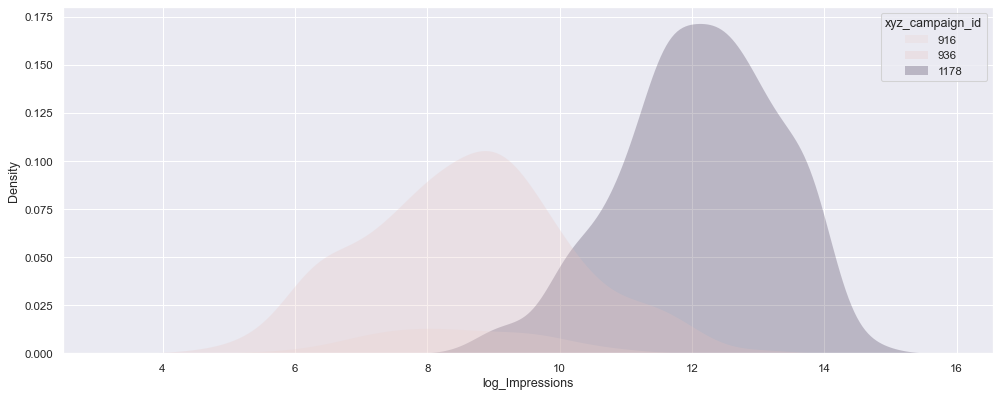

In [54]:
# Создаем гистограмму для преобразованного столбца 'log_Impressions'
sns.kdeplot(data=data, x='log_Impressions', hue='xyz_campaign_id',fill=True, linewidth=0)

In [58]:
# кластеризация
from sklearn.mixture import GaussianMixture # метод кластеризации
dat = np.log1p(data.groupby('fb_campaign_id').Impressions.sum()).values.reshape(-1,1) # готовим данные
mix = GaussianMixture(n_components=2).fit(dat) # строим модель
labels = mix.predict(dat)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_1248\3290165042.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dat[labels == 0], kde=False, bins=50)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_1248\3290165042.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dat[labels == 1], 

<Axes: >

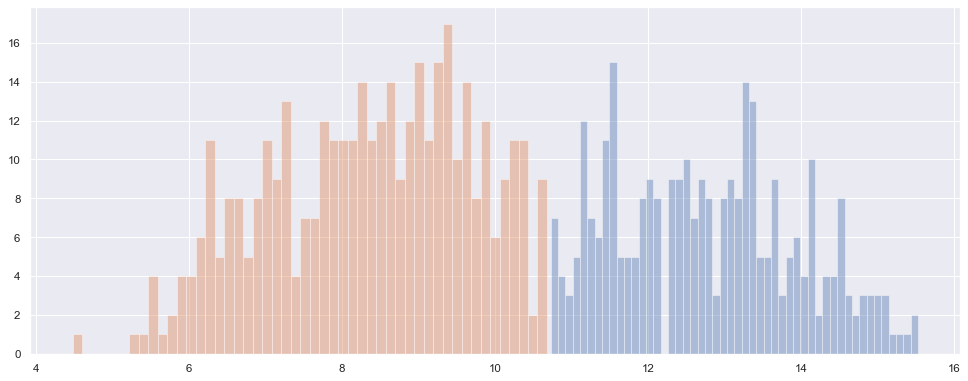

In [59]:
sns.distplot(dat[labels == 0], kde=False, bins=50)
sns.distplot(dat[labels == 1], kde=False, bins=50)

3.	Создайте новую колонку c CTR. Посмотрите на описательные статистики и распределение.

In [19]:
data['CTR'] = (data['Clicks'] / data['Impressions']) * 100

In [62]:
data.set_index('ad_id').CTR.idxmax()

738637

In [73]:
data[['CTR','ad_id']].sort_values(by='CTR',ascending=False).nlargest(1,'CTR')

,CTR,ad_id
150,0.105932,738637


<Axes: xlabel='CTR'>

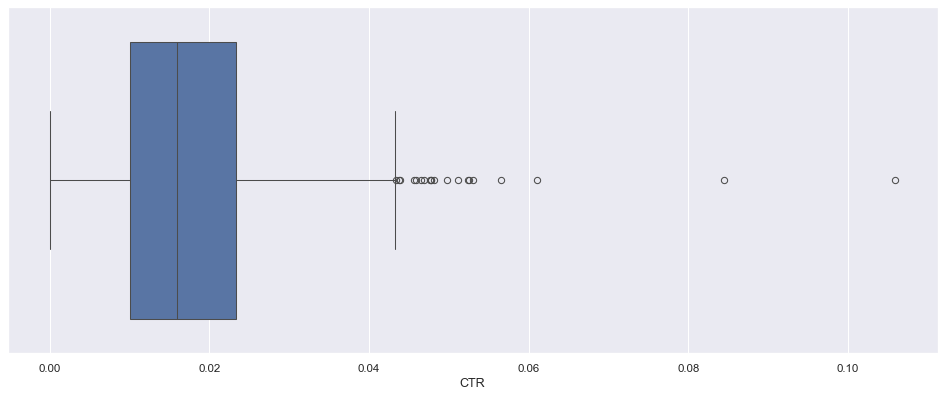

In [26]:
sns.boxplot(data=data,x = 'CTR')

4.	Проанализируйте CTR с разбивкой по рекламной кампании.

In [27]:
data.head(1)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,log_Impressions,CTR
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,8.902592,0.013605


In [41]:
# Предположим, что 'data' - это ваш DataFrame
# Используем groupby для анализа CTR с разбивкой по 'xyz_campaign_id' и 'fb_campaign_id'
ctr_by_campaign = data.groupby(['xyz_campaign_id','ad_id', 'fb_campaign_id'])['CTR'].agg(['mean','std','count'])
ctr_by_campaign


mean  std  count
xyz_campaign_id ad_id   fb_campaign_id                      
916             708746  103916          0.013605  NaN      1
                708749  103917          0.011198  NaN      1
                708771  103920          0.000000  NaN      1
                708815  103928          0.023480  NaN      1
                708818  103928          0.024195  NaN      1
...                                          ...  ...    ...
1178            1314410 179977          0.022305  NaN      1
                1314411 179978          0.018822  NaN      1
                1314412 179979          0.018478  NaN      1
                1314414 179981          0.017083  NaN      1
                1314415 179982          0.022215  NaN      1

[1143 rows x 3 columns]

<Axes: xlabel='CTR', ylabel='Count'>

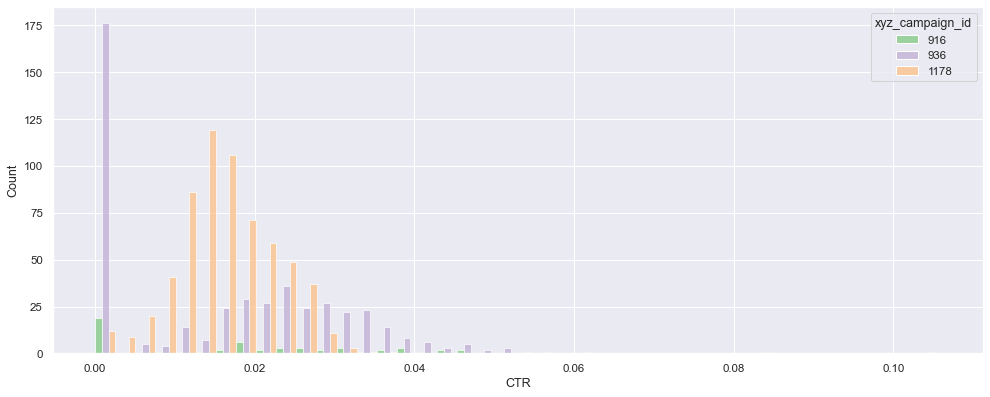

In [87]:
sns.histplot(data=data,x='CTR',hue='xyz_campaign_id',multiple="dodge",palette='Accent')

6.	Посчитайте стоимость за клик пользователя по объявлению (CPC). Изучите полученные значения, используя меры центральной тенденции и меры изменчивости. 

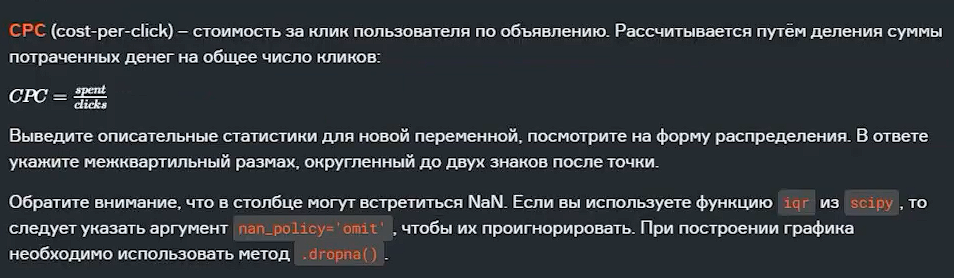

<Axes: >

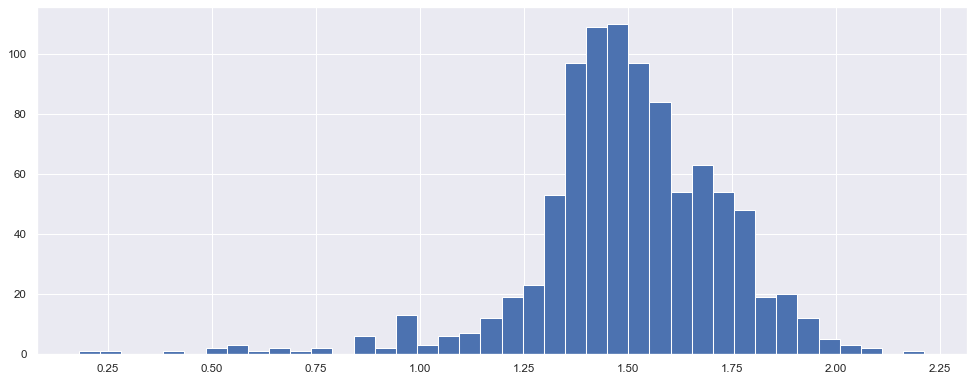

In [103]:
data['CPC'] = data['Spent'] / data['Clicks']
data['CPC'].hist(bins=40)

In [104]:
data['CPC'].describe()

count    936.000000
mean       1.499347
std        0.232879
min        0.180000
25%        1.390000
50%        1.498273
75%        1.644364
max        2.212000
Name: CPC, dtype: float64

In [107]:
# межквартильный размах
from scipy import stats
stats.iqr(data.dropna().CPC).round(2)

0.25

7. Визуализируйте график CPC

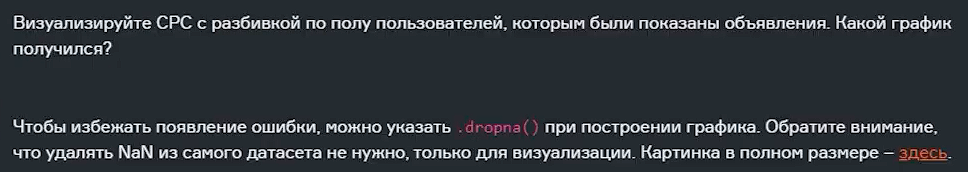

<Axes: xlabel='CPC', ylabel='Count'>

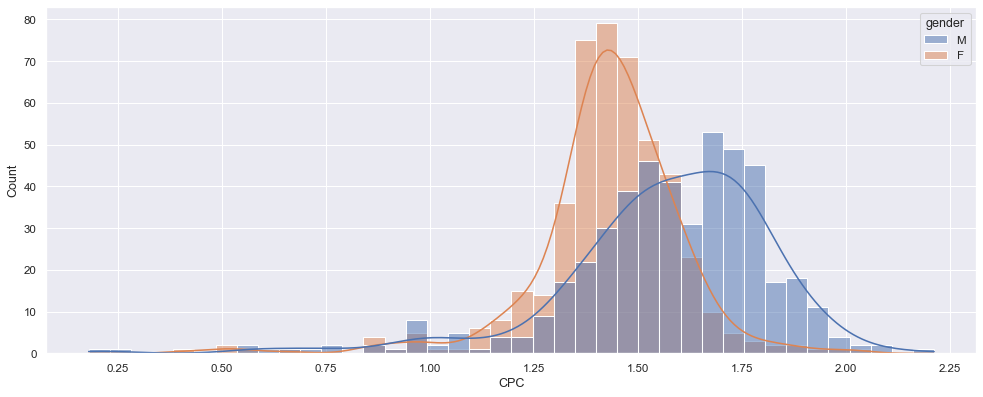

In [108]:
sns.histplot(data=data.dropna(), x = 'CPC', hue = 'gender', kde=True)

8.	Посчитайте конверсию из клика в покупку.

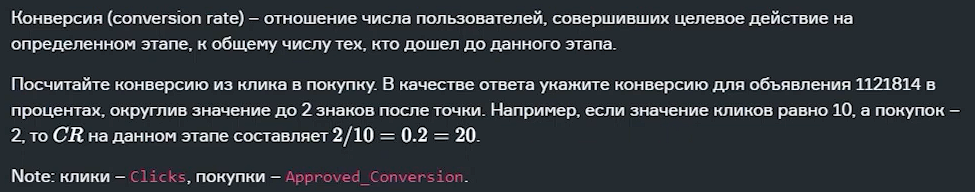

In [110]:
data['conv_rate'] = (data.Approved_Conversion / data.Clicks).mul(100)
data['conv_rate'].head(5)

0    100.0
1      0.0
2      NaN
3      0.0
4    100.0
Name: conv_rate, dtype: float64

In [113]:
data.query('ad_id == 1121814').conv_rate.round(2)

860    3.09
Name: conv_rate, dtype: float64